# Savanna Barcode Intelligence - Quickstart

This notebook shows you how to get started with Zebra's Savanna APIs related to Barcode Intelligence
- UPC Lookup
- Barcode Creation
- FDA recall information for both food and drugs

## Setup

* In order to run the sample code in this guide you will need an API key, to obtain an API key follow the instructions detailed on the Zebra developer portal at **https://developer.zebra.com/getting-started-0**
* Once you have created a login to the developer portal and created an application you must ensure you have selected the **Barcode Intelligence** package and **associated this with your application**

To run a cell:
- Click anywhere in the code block.
- Click the play button in the top-left of the code block

In [122]:
# Paste your API key below, this might also be called the 'Consumer Key' on the portal
api_key = ''

In [313]:
print('Your API key is: ' + api_key)

Your API key is: 


## UPC Lookup

The UPC Lookup API provides product descriptions, photos and pricing for a wide range of products

In [337]:
# Enter a barcode to look up or uncomment one of the suggested values
barcode = ''
#barcode = '9780141032016'  #Book
#barcode = '9780099558453'  #Book
#barcode = '9780141039190'  #Book

The UPC Lookup functionality is delivered as a REST API.  Run the below code to return information about your specified barcode

In [338]:
import requests
from requests.exceptions import HTTPError
barcode_lookup_url = 'https://api.zebra.com/v2/tools/barcode/lookup?upc=' + barcode
headers = {'apikey': api_key}

try:
    response = requests.get(url = barcode_lookup_url, headers = headers, params = {})
    response.raise_for_status()
except HTTPError as http_err:
    print(f'HTTP error: {http_err}')
    print(response.json())
except Exception as err:
    print(f'Other error: {err}')
else:
    print(json.dumps(response.json(), indent=4)) 

{
    "code": "OK",
    "total": 1,
    "offset": 0,
    "items": [
        {
            "ean": "9780141039190",
            "title": "Frederick the Great",
            "description": "",
            "isbn": "9780141039190",
            "publisher": "Gardners Books",
            "images": [
                "https://pictures.abebooks.com/isbn/9780141039190-us.jpg",
                "http://www0.alibris-static.com/isbn/9780141039190.gif",
                "http://www0.alibris-static.com/isbn/9780141039190.gif",
                "https://dut2up1aqgazz.cloudfront.net/70024743/9780141039190.jpg",
                ""
            ],
            "offers": [
                {
                    "merchant": "eCampus.com",
                    "domain": "ecampus.com",
                    "title": "Frederick the Great",
                    "currency": "",
                    "list_price": "",
                    "price": 17.75,
                    "shipping": "",
                    "condition": "New

The following code will display the first returned image associated with the previously specified barcode

Image: https://pictures.abebooks.com/isbn/9780141039190-us.jpg


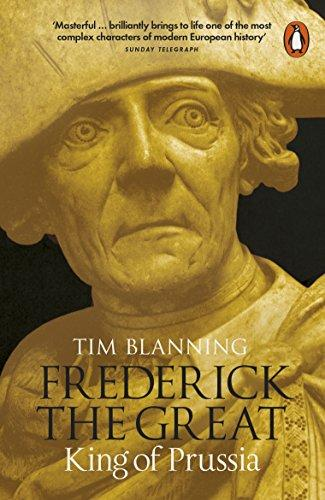

In [339]:
from IPython.display import Image
response_json = response.json()
if ('items' in response_json and 'images' in response_json['items'][0]):
    print('Image: ' + response_json['items'][0]['images'][0])
    photo_url = response_json['items'][0]['images'][0]
else:
    print('Image not found')
    photo_url = "https://www.zebra.com/gb/en/header/jcr:content/mainpar/header/navigationComponent/logoImage.adapt.full.png"
    
Image(photo_url, width=200)



## Create Barcode

The [Create Barcode](https://developer.zebra.com/tools-create-barcode/apis) API will generate a barcode image from the specified barcode data.  

*Many symbologies are supported but the code snippet below will work with EAN 13 barcodes using the barcode value specified in the previous step*

ok - barcode generated


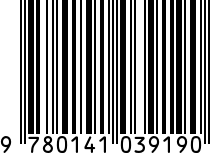

In [340]:
import requests
from requests.exceptions import HTTPError
from IPython.display import Image
barcode_lookup_url = 'https://api.zebra.com/v2/tools/barcode/generate/?symbology=ean13&includeText=true&text=' + barcode
headers = {'apikey': api_key}

try:
    response = requests.get(url = barcode_lookup_url, headers = headers, params = {})
    response.raise_for_status()
except HTTPError as http_err:
    print(f'HTTP error: {http_err}')
    print(response.json())
except Exception as err:
    print(f'Other error: {err}')
else:
    generated_barcode_binary = response.content
    Image(generated_barcode_binary)
    print('ok - barcode generated')
    
Image(generated_barcode_binary)

## Food Recall


You can search for food recall announcements by UPC

In [341]:
# Specify the UPC to search for related FDA food recall announcements
food_recall_upc = ''
#food_recall_upc = '2324617054'   # Shrimp Rolls
#food_recall_upc = '691035359586'  # Raisens

In [342]:
import requests
from requests.exceptions import HTTPError
food_recall_url = 'https://api.zebra.com/v2/tools/recalls/food/upc?limit=1&val=' + food_recall_upc
headers = {'apikey': api_key}

try:
    response = requests.get(url = food_recall_url, headers = headers, params = {})
    response.raise_for_status()
except HTTPError as http_err:
    print(f'HTTP error: {http_err}')
    print(response.json())
except Exception as err:
    print(f'Other error: {err}')
else:
    print("Food Recall information is listed below:")
    print(json.dumps(response.json(), indent=4))

HTTP error: 400 Client Error: Bad Request for url: https://api.zebra.com/v2/tools/recalls/food/upc?limit=1&val=
{'result': 'No valid `val` parameter provided.'}


## Drug Recall

You can search for medical recall information either by search term (for medical devices or drug recalls) or by specifying a UPC.  This sample shows a search for drug recalls related to the specified search term.  You can change how many results are returned by modifying the limit parameter in the URL.

In [305]:
# Specify a one word description to search for drug recalls about
drug_search_term = ''
#drug_search_term = 'head'
#drug_search_term = 'stomach'

In [306]:
import requests
from requests.exceptions import HTTPError
drug_recall_url = 'https://api.zebra.com/v2/tools/recalls/drug/description?limit=2&val=' + drug_search_term
headers = {'apikey': api_key}

try:
    response = requests.get(url = drug_recall_url, headers = headers, params = {})
    response.raise_for_status()
except HTTPError as http_err:
    print(f'HTTP error: {http_err}')
    print(response.json())
except Exception as err:
    print(f'Other error: {err}')
else:
    print("Drug Recall information is listed below:")
    print(json.dumps(response.json(), indent=4))

HTTP error: 400 Client Error: Bad Request for url: https://api.zebra.com/v2/tools/recalls/drug/description?limit=2&val=
{'result': 'No `val` parameter provided.'}


## What's next?

Next, explore the [other APIs](https://developer.zebra.com/apis) available in Savanna or submit a new API suggestion to the [Sandbox](https://developer.zebra.com/sandbox-overview).

If you have questions then please visit the [Developer Portal](https://developer.zebra.com)
